In [86]:
# Importo las librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import prince
warnings.filterwarnings("ignore")




## **Descripción del Dataset**
##### El dataset se compone de 36275 filas y 18 columnas, sin contar la columna Booking_ID que se utilizará como índice del DataFrame.

#### **Indice**:

*   Booking_ID: Identificador único para cada reserva

#### **Columnas**:

*   no_of_adults: Número de adultos asociados en la reserva.
*   no_of_children: Número de menores de edad asociados a la reserva.
*   no_of_weekend_nights: Número de noches de fin de semana asociado a la reserva.
*   no_of_week_nights: Número de noches de día de semana asociado a la reserva.
*   type_of_meal_plan: Tipo de plan de comidas elegido por el usuario.
*   required_car_parking_space: El ususario contrató servicio de parking? (0 - No, 1- Si).
*   room_type_reserved: Tipo de habitación contratada.
*   lead_time: Número de días entre la fecha de reserva y la fecha de llegada al hotel.
*   arrival_year: Año de llegada.
*   arrival_month: Mes de llegada.
*   arrival_date: Día de llegada.
*   market_segment_type: Designación de segmento de mercado (si la reserva fue hecha online, offline u otros).
*   repeated_guest: Si el usuario es un huesped repetido (0 - No, 1- Si)
*   no_of_previous_cancellations: Número de cancelaciones previas.
*   no_of_previous_bookings_not_canceled: Número de reservas previas que no fueron canceladas por el usuario.
*   avg_price_per_room: Prcio promedio por habitación.
*   no_of_special_requests: Número de solicitudes especiales realizadas por el usuario.
*   booking_status: Estado de la reserva (Cancelada, No cancelada).














In [87]:
path_archivo = r'C:\Users\54112\Desktop\Cursos\Coderhouse\DataScience\proyecto_data_science\Hotel Reservations.csv' # Cambiar Ruta 
df_reserva_hoteles = pd.read_csv(path_archivo, index_col=0) # Asocio el Booking ID al índice del DataFrame

In [88]:
df_reserva_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [89]:
print(f'La variable required_car_parking_space admite los valores: {df_reserva_hoteles.required_car_parking_space.unique()} por lo tanto la considero categórica\n')
print(f'Lo mismo sucede para la variable repeated_guest: {df_reserva_hoteles.repeated_guest.unique()}')

La variable required_car_parking_space admite los valores: [0 1] por lo tanto la considero categórica

Lo mismo sucede para la variable repeated_guest: [0 1]


In [90]:
# Lista de variables categóricas
categorical_vars = df_reserva_hoteles.select_dtypes(include=['object']).columns.tolist() + ['repeated_guest', 'required_car_parking_space']
categorical_vars.remove('booking_status')
# Convertir las variables object a tipo 'category'
df_reserva_hoteles[categorical_vars] = df_reserva_hoteles[categorical_vars].astype('category')

In [91]:
df_reserva_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 1

In [92]:
# La biblioteca Prince no deja plottear FAMD para una fuente de datos con más de 5 mil registros:
# "The number of rows in your dataset is greater than the maximum allowed (5000)."
# Por lo tanto para Reducción de dimensionalidad me quedo con un 5 mil registros al azar. 

# Seleccionar 5000 registros al azar
sampled_data = df_reserva_hoteles.sample(n=5000, random_state=42)

In [93]:
# Aplico FAMD (Reducción de dimensionalidad para variables mixtas, es decir, mezcla de variables numéricas y categoricas) 
data_sin_na = sampled_data.dropna().drop('booking_status', axis = 1)
famd = prince.FAMD(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(data_sin_na)

In [94]:
print('La varianza explicada es muy chica')
famd.eigenvalues_summary


La varianza explicada es muy chica


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,24.420,0.70%,0.70%
1,20.738,0.59%,1.29%


In [95]:
print(famd.column_coordinates_[0].sort_values()) # Ordeno de menor a mayor los pesos de la primer componente

print(f'\nLas variables más relevantes son aquellas con más peso:\n{famd.column_coordinates_[0].sort_values().index[-2:].to_list()}')

variable
required_car_parking_space              0.002944
type_of_meal_plan                       0.003598
arrival_year                            0.012323
no_of_children                          0.020545
arrival_date                            0.026333
no_of_special_requests                  0.037759
no_of_weekend_nights                    0.052970
room_type_reserved                      0.055855
arrival_month                           0.061400
no_of_week_nights                       0.099592
avg_price_per_room                      0.099622
no_of_adults                            0.261852
lead_time                               0.284218
no_of_previous_cancellations            0.331144
market_segment_type                     0.441037
no_of_previous_bookings_not_canceled    0.658818
repeated_guest                          0.689706
Name: 0, dtype: float64

Las variables más relevantes son aquellas con más peso:
['no_of_previous_bookings_not_canceled', 'repeated_guest']


In [96]:
print('En verde se plotean las columnas, en azul las observaciones.\nSe observan al menos dos grupos (o clusters) concentrados de observaciones. ')
famd.plot(
    data_sin_na,
    x_component=0,
    y_component=1
)

En verde se plotean las columnas, en azul las observaciones.
Se observan al menos dos grupos (o clusters) concentrados de observaciones. 


alt.LayerChart(...)

#### Feature Engineering a partir de las columnas de Año, Mes y Día.

Creo una nueva columna de tipo de dato datetime64[ns] con formato %Y-%m-%d

Resumiendo: Creo una columna Fecha a partir de las tres columnas correspondientes al año, mes y día. 
Con la columna Fecha creo una variable categorica con los valores de la semana (Monday, Tuesday, etc) y luego elimino las columnas año, mes y día.

In [97]:
df_reserva_hoteles['Fecha'] = pd.to_datetime(df_reserva_hoteles['arrival_year'].astype('str') + '-' + df_reserva_hoteles['arrival_month'].astype('str') + '-' + df_reserva_hoteles['arrival_date'].astype('str'), format='%Y-%m-%d', errors='coerce')

In [98]:
# Encuentra las filas con fechas inválidas
fechas_incorrectas = df_reserva_hoteles[df_reserva_hoteles['Fecha'].isna()]

# Muestra las filas con fechas inválidas
print("Registros con fechas inválidas:")
print(fechas_incorrectas[['arrival_year', 'arrival_month','arrival_date']])

Registros con fechas inválidas:
            arrival_year  arrival_month  arrival_date
Booking_ID                                           
INN02627            2018              2            29
INN03678            2018              2            29
INN05601            2018              2            29
INN06344            2018              2            29
INN07649            2018              2            29
INN08001            2018              2            29
INN08990            2018              2            29
INN09154            2018              2            29
INN09246            2018              2            29
INN09665            2018              2            29
INN09935            2018              2            29
INN10594            2018              2            29
INN10653            2018              2            29
INN10748            2018              2            29
INN11882            2018              2            29
INN13959            2018              2           

In [99]:
df_reserva_hoteles = df_reserva_hoteles.dropna(subset=['Fecha']) # Elimino todos esos registros, ya que la fecha es incorrecta. 

In [100]:
df_reserva_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, INN00001 to INN36275
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  category      
 5   required_car_parking_space            36238 non-null  category      
 6   room_type_reserved                    36238 non-null  category      
 7   lead_time                             36238 non-null  int64         
 8   arrival_year                          36238 non-null  int64         
 9   arrival_month                         36238 non-null  int64        

In [101]:
df_reserva_hoteles['day_of_week'] = df_reserva_hoteles['Fecha'].dt.strftime('%A').astype('category')

In [102]:
df_reserva_hoteles.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Fecha,day_of_week
Booking_ID,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,Monday
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,Tuesday
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,Wednesday
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,Sunday
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,Wednesday


In [103]:
df_reserva_hoteles.drop(['arrival_year', 'arrival_month', 'arrival_date', 'Fecha'], axis = 1, inplace=True) # Elimino del set de datos las varibles de fecha

In [104]:
df_reserva_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, INN00001 to INN36275
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  category
 5   required_car_parking_space            36238 non-null  category
 6   room_type_reserved                    36238 non-null  category
 7   lead_time                             36238 non-null  int64   
 8   market_segment_type                   36238 non-null  category
 9   repeated_guest                        36238 non-null  category
 10  no_of_previous_cancellations          36238 non-null  int64   
 1

<!-- ### Visualizaciones -->

# Implementación de algoritmos de Machine Learning

Se aplicará sobre el set de datos el algorimto de regresión logística y de random forest. Previamente se aplicará la técnica de one hot encoding a las variables categóricas y se normalizarán las variables numéricas.

Los pasos a seguir son:



*   Reemplazar los valores categoricos de la variable objetivo (booking_status) por valores numéricos
*   Aplicar la técnica de One Hot Encoding a las variables categoricas
*   Normalizar las variables 
*   Entrenar modelos con algoritmos de aprendizaje supervisado y de clasificación





In [105]:
df_reserva_hoteles_copia = df_reserva_hoteles.copy()

##### Reemplazo los valores categoricos de la variable objetivo por valores numéricos

In [106]:
df_reserva_hoteles_copia['booking_status'] = df_reserva_hoteles_copia['booking_status'].replace({'Not_Canceled':0, 'Canceled':1}) 

# Reemplazo la variable objetivo por 0 y 1

# Acá booking_status pasó de ser de tipo object a tipo int64. Si a esa variable la convertías en tipo categorico antes,
#  iba a quedar de ese tipo de dato aún remplazando los valores por 0 y 1.

In [107]:
df_reserva_hoteles_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, INN00001 to INN36275
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  category
 5   required_car_parking_space            36238 non-null  category
 6   room_type_reserved                    36238 non-null  category
 7   lead_time                             36238 non-null  int64   
 8   market_segment_type                   36238 non-null  category
 9   repeated_guest                        36238 non-null  category
 10  no_of_previous_cancellations          36238 non-null  int64   
 1

##### Conversión de variables categoricas a numéricas (One Hot Encoding)

In [108]:
df_reserva_hoteles_copia = pd.get_dummies(df_reserva_hoteles_copia, drop_first=False)
# Se utiliza la técnica One Hot Encoding con la función get_dummies() de la
# biblioteca pandas para convertir cada variable categórica en una serie de
# variables ficticias binarias.

In [109]:
df_reserva_hoteles_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, INN00001 to INN36275
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   lead_time                             36238 non-null  int64  
 5   no_of_previous_cancellations          36238 non-null  int64  
 6   no_of_previous_bookings_not_canceled  36238 non-null  int64  
 7   avg_price_per_room                    36238 non-null  float64
 8   no_of_special_requests                36238 non-null  int64  
 9   booking_status                        36238 non-null  int64  
 10  type_of_meal_plan_Meal Plan 1         36238 non-null  uint8  
 11  type_of_me

##### Normalización de las variables

In [110]:
variables_a_normalizar = df_reserva_hoteles_copia.columns.to_list()[0:9] + df_reserva_hoteles_copia.columns.to_list()[10::]
# Descarto la variable etiqueta (booking_status) para la normalización. En este caso normalizo las variables dummies y las numéricas

In [111]:

# Creo una función para normalizar variables 

def normalizar(variable):
  df_reserva_hoteles_copia[variable] = (df_reserva_hoteles_copia[variable] - df_reserva_hoteles_copia[variable].mean())/(df_reserva_hoteles_copia[variable].max()-df_reserva_hoteles_copia[variable].min())
  return df_reserva_hoteles_copia[variable]

print('Normalizamos las siguientes variables numéricas: \n')
for i in range(0, len(variables_a_normalizar)): 
  normalizar(variables_a_normalizar[i])

df_reserva_hoteles_copia.head()

Normalizamos las siguientes variables numéricas: 



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,...,market_segment_type_Online,repeated_guest_0,repeated_guest_1,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,0.038675,-0.010522,0.027075,-0.012012,0.313149,-0.001796,-0.002637,-0.071180,-0.123991,0,...,-0.640046,0.025553,-0.025553,-0.13083,0.851537,-0.149539,-0.169297,-0.125393,-0.13519,-0.141288
INN00002,0.038675,-0.010522,0.169932,0.046811,-0.181208,-0.001796,-0.002637,0.006005,0.076009,0,...,0.359954,0.025553,-0.025553,-0.13083,-0.148463,-0.149539,-0.169297,-0.125393,0.86481,-0.141288
INN00003,-0.211325,-0.010522,0.169932,-0.070836,-0.190237,-0.001796,-0.002637,-0.080439,-0.123991,1,...,0.359954,0.025553,-0.025553,-0.13083,-0.148463,-0.149539,-0.169297,-0.125393,-0.13519,0.858712
INN00004,0.038675,-0.010522,-0.115782,-0.012012,0.283803,-0.001796,-0.002637,-0.006365,-0.123991,1,...,0.359954,0.025553,-0.025553,-0.13083,-0.148463,-0.149539,0.830703,-0.125393,-0.13519,-0.141288
INN00005,0.038675,-0.010522,0.027075,-0.070836,-0.084142,-0.001796,-0.002637,-0.016550,-0.123991,1,...,0.359954,0.025553,-0.025553,-0.13083,-0.148463,-0.149539,-0.169297,-0.125393,-0.13519,0.858712


##### Regresión Logística (Clasificación)

In [112]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [113]:
X = df_reserva_hoteles_copia.drop(columns=['booking_status']) # Me quedo con todos los datos menos con la varible target
y = df_reserva_hoteles_copia['booking_status']              # Variable target

In [114]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False) # ¿Qué creen que son los parámetros shuffle y random state?
# Shuffle es mezclar
# random_state es una forma de que si hay mezcla, sea siempre de la misma manera.

In [115]:
modelo_lr = LogisticRegression(max_iter=1000, n_jobs=-1)  # Instanciamos el objeto de tipo LogisticRegression.
modelo_lr.fit(X_train, y_train)  # Ajustamos el modelo con los datos de entrenamiento

#n_jobs se utiliza para especificar el número de núcleos de procesador que se deben utilizar para ajustar el modelo de regresión logística
# si se pone -1 se utilizan todos los núcleos disponibles

# max_iter controla el número máximo de iteraciones permitidas para que el algoritmo de regresión logística converja y encuentre la solución.
# Por defecto, este valor es 100

LogisticRegression(max_iter=1000, n_jobs=-1)

In [116]:
# Obtenemos las predicciones del modelo con X_test

y_pred = modelo_lr.predict(X_test)

In [117]:
print(f'La precisión del modelo con los parametros elegidos es de {round(metrics.accuracy_score(y_test, y_pred),3)}')
# (preds == y_test).sum()/y_test.count()

La precisión del modelo con los parametros elegidos es de 0.793


In [118]:
print(f'Se podría usar el f1_score como métrica ya que los datos de la variable objetivo están desbalanceados:\n \n{y.value_counts()}')

Se podría usar el f1_score como métrica ya que los datos de la variable objetivo están desbalanceados:
 
0    24360
1    11878
Name: booking_status, dtype: int64


In [119]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      7293
           1       0.74      0.58      0.65      3579

    accuracy                           0.79     10872
   macro avg       0.77      0.74      0.75     10872
weighted avg       0.79      0.79      0.79     10872



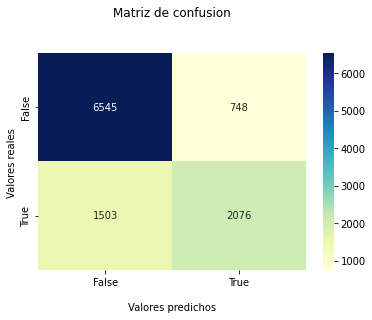

In [120]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu', fmt='d')
ax.set_title('Matriz de confusion\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Resultados de la regresión logística:


En la diagonal de la matriz de confusión se encuentran los valores acertados por el modelo.

En el caso de que el modelo predijo que no iba a suceder una cancelación en la reserva y efectivamente no se canceló la reserva, presenta la mayor cantidad de aciertos (False - False). Esto puede deberse también a que la variable objetivo está desbalanceada. Hay muchos más registros en donde no hubo cancelaciones que en donde si las hubo.

Por otro lado, de las metricas se puede destacar f1_score ya que combina la precision y el recall (más representativas de variable target desbalanceadas). Para mejorar el modelo se podría dividir el dataset en 3 partes, una parte para training, otra para la validación y otra para el test. De esta manera se podrían elegir los hiperparametros que mejor funcionen a partir de la validación del modelo y evitar el sobreajuste del modelo.

##### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=10, random_state=42)  # Instanciamos el objeto de tipo RandomForest.
modelo_random_forest.fit(X_train, y_train) # Ajustamos el modelo con los datos de entrenamiento

RandomForestClassifier(max_depth=10, random_state=42)

In [122]:
# Obtener predicciones
y_pred = modelo_random_forest.predict(X_test)

In [123]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7293
           1       0.84      0.67      0.75      3579

    accuracy                           0.85     10872
   macro avg       0.85      0.80      0.82     10872
weighted avg       0.85      0.85      0.85     10872



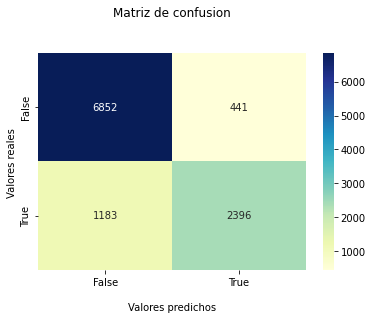

In [124]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu', fmt='d')
ax.set_title('Matriz de confusion\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Resultados del modelo Random Forest:


Se observa una mejora en los resultados del F1-Score en comparación al modelo de regresión logística. 
Con una probabilidad de acierto para los casos en donde no hubo cancelación de la reserva de 0.9
y de 0.75 para casos con cancelación en la reserva. Los resultados dependen de la elección del hiperparámetro
"max_depth". A mayor valor de "max_depth" mejores resultados pero mayor chance de sobre ajuste (Alta varianza)

### Cross Validation (StratifiedKFold). Se usa StratifiedKFold debido a que es un problema de clasificación (supervisado) y la variable objetivo se encuentra desbalanceada.

In [125]:
# stratifiedkfold
kf = StratifiedKFold(n_splits=7, random_state=42, shuffle=True)


##### Regresión logística

In [126]:
score = cross_val_score(LogisticRegression(max_iter=1000, n_jobs=-1), X, y, cv= kf, scoring="f1_macro") # Cross Validation separa el conjunto de datos en 10. Y cada uno contiene sus datos de entrenamiento y de testeo.
print(f'\nF1 (macro) para cada partición: {score.round(3)}')
print(f'Promedio: {round(score.mean(), 2)}')


F1 (macro) para cada partición: [0.767 0.754 0.769 0.758 0.767 0.771 0.76 ]
Promedio: 0.76


##### Random Forest

In [127]:
score = cross_val_score(RandomForestClassifier(max_depth=10, random_state=42), X, y, cv= kf, scoring="f1_macro")
print(f'\nF1 (macro) para cada partición: {score.round(3)}')
print(f'Promedio: {"{:.2f}".format(score.mean())}')


F1 (macro) para cada partición: [0.838 0.828 0.829 0.826 0.829 0.831 0.833]
Promedio: 0.83


In [128]:
for count in range(10,20,3):
    score = cross_val_score(RandomForestClassifier(max_depth=count, random_state=42), X, y, cv= kf, scoring="f1_macro")
    print(f'Para profundidad máx: {count}, la media del F1 (macro) score es: {round(score.mean(), 2)}')

Para profundidad máx: 10, la media del F1 (macro) score es: 0.83
Para profundidad máx: 13, la media del F1 (macro) score es: 0.85
Para profundidad máx: 16, la media del F1 (macro) score es: 0.86
Para profundidad máx: 19, la media del F1 (macro) score es: 0.87


##### Conclusiones (CV)

- Con el método de separación del conjunto de datos en train (70%) y test (30%) el score f1_macro daba 0.75 para el algoritmo de regresión logística y 0.82 para el de Random Forest.
Aplicando CV (StratifiedKFold) aumenta muy poco, a 0.76 y a 0.83 para los mismos modelos con los mismos hiperparámetros.

- A medida que aumenta el hiperparametro max_depth, mejor performance del modelo.

- Se usa StratifiedKFold porque la variable objetivo está desbalanceada.

- A partir de la CV se evita el sobre ajuste